In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
male_world= pd.read_csv("Time use world- Male/time_spent_in_unpaid_household_work_male.csv", skiprows=4)

male_world = male_world.melt(id_vars=["Country Name", "Country Code", "Indicator Name","Indicator Code"], var_name="year",value_name="time_spent")
male_world= male_world[["Country Name", "Country Code", "year","time_spent"]]
male_world  = male_world[~ (male_world["time_spent"].isna())]

male_world = male_world.sort_values(["Country Name", "year"])
male_world = male_world.drop_duplicates(subset=["Country Name"], keep="last" , ignore_index=True)

male_world["gender"]="Male"


In [46]:
# combaining male and female data

master_world = female_world.append(male_world)
master_world

,Country Name,Country Code,year,time_spent,gender
0,Albania,ALB,2011,21.73611,Female
1,Algeria,DZA,2012,21.66667,Female
2,Argentina,ARG,2013,23.41864,Female
3,Armenia,ARM,2008,21.65833,Female
4,Australia,AUS,2006,20.83333,Female
...,...,...,...,...,...
84,Uganda,UGA,2018,7.50000,Male
85,United Kingdom,GBR,2015,6.96528,Male
86,United States,USA,2019,9.66667,Male
87,Uruguay,URY,2013,8.37738,Male


### GDP countries

In [47]:
gdp_world = pd.read_csv("C:\Projects\Time Use Servey - India and the World\GDP per capita ppp world\API_NY.GDP.PCAP.PP.KD_DS2_en_csv_v2_3755700.csv", skiprows=4)

gdp_world.drop(["Indicator Name", "Indicator Code"], axis=1, inplace=True)

gdp_world = gdp_world.melt(id_vars=["Country Name", "Country Code"], var_name="year", value_name="gdp")

gdp_world=gdp_world.dropna()
gdp_world

master_world = master_world.merge(gdp_world, how="left")

master_world

,Country Name,Country Code,year,time_spent,gender,gdp
0,Albania,ALB,2011,21.73611,Female,11052.793610
1,Algeria,DZA,2012,21.66667,Female,11233.517038
2,Argentina,ARG,2013,23.41864,Female,24424.136447
3,Armenia,ARM,2008,21.65833,Female,10467.529814
4,Australia,AUS,2006,20.83333,Female,42738.465787
...,...,...,...,...,...,...
173,Uganda,UGA,2018,7.50000,Male,2124.792203
174,United Kingdom,GBR,2015,6.96528,Male,45041.057180
175,United States,USA,2019,9.66667,Male,62630.873277
176,Uruguay,URY,2013,8.37738,Male,21786.211935


### Labour force participation

In [51]:
labour_participation = pd.read_csv("C:\Projects\Time Use Servey - India and the World\Female labor force participation\API_SL.TLF.CACT.FE.ZS_DS2_en_csv_v2_3645159.csv", skiprows=4)

labour_participation.drop(["Indicator Name", "Indicator Code"], axis=1, inplace=True)

labour_participation = labour_participation.melt(id_vars=["Country Name", "Country Code"], var_name="year", value_name="labor_force_participation")

labour_participation=labour_participation.dropna()

master_world= master_world.merge(labour_participation, how="left")
master_world

,Country Name,Country Code,year,time_spent,gender,gdp,labor_force_participation
0,Albania,ALB,2011,21.73611,Female,11052.793610,52.445999
1,Albania,ALB,2011,3.47222,Male,11052.793610,52.445999
2,Algeria,DZA,2012,21.66667,Female,11233.517038,15.823000
3,Algeria,DZA,2012,3.75000,Male,11233.517038,15.823000
4,Argentina,ARG,2013,23.41864,Female,24424.136447,47.826000
...,...,...,...,...,...,...,...
173,United States,USA,2019,9.66667,Male,62630.873277,56.596001
174,Uruguay,URY,2013,19.87475,Female,21786.211935,55.377998
175,Uruguay,URY,2013,8.37738,Male,21786.211935,55.377998
176,West Bank and Gaza,PSE,2013,20.13889,Female,6118.257181,15.584000


### Per capita Income and Time spent in Household chores (for females)

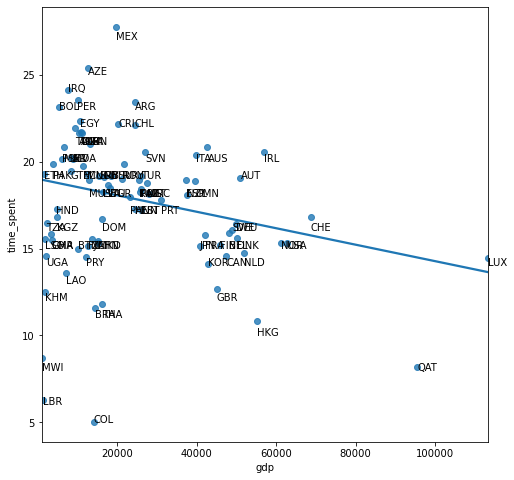

In [94]:
fig, ax = plt.subplots(figsize=(8,8))

master_female= master_world[master_world.gender=="Female"]

master_female=master_female.dropna()

ax = sns.regplot(data=master_female, x='gdp', y="time_spent", ci=None, robust=True, ax=ax)

for txt,x,y in zip(master_female["Country Code"], master_female['gdp'], master_female["time_spent"]):
    ax.text(int(x),int(y), txt)


### India and states in India

In [4]:
india = pd.read_csv("proportion of time spent in household chores india.csv")
state_code= pd.read_csv("state_code.csv")
state_code=state_code[["State Code", "State Name"]]
state_code=state_code.append({"State Code":37, "State Name":"India"}, ignore_index=True)
india = india.merge(state_code, right_on="State Code",left_on="state",how="left" )

india = india[["State Name", "Gender", "time_spent"]]
india["Gender"]=india.Gender.replace({1:"Male",2:"Female",3:"Other"})

<AxesSubplot:xlabel='propotion', ylabel='State Name'>

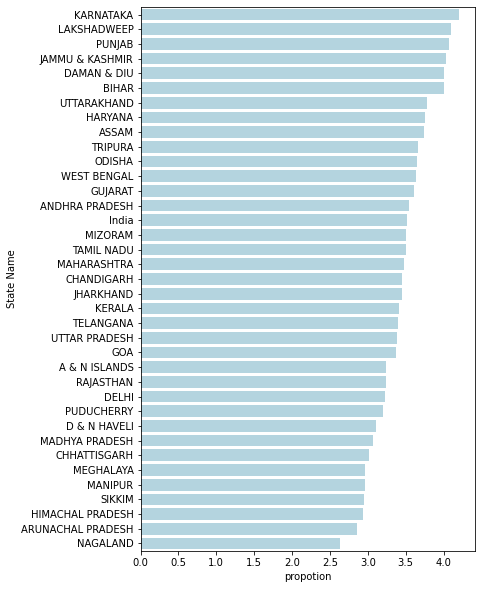

In [21]:
ax = plt.subplots(figsize=(6,10))


data_female = india[india["Gender"]=="Female"]
data_male = india[india["Gender"]=="Male"]



data = data_male.merge(data_female, on="State Name")

data["propotion"]= data["time_spent_y"]/data["time_spent_x"]
data=data.sort_values(by="propotion", ascending=False)
sns.barplot(data=data, y="State Name", x="propotion", color="lightblue")


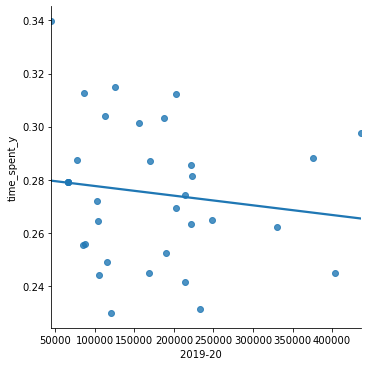

In [16]:
gdp= pd.read_csv("C:\Projects\CSR Data\Datasets\per capita Net GSDP.csv")

gdp_pc = gdp.T.reset_index()
gdp_pc.columns= gdp_pc.iloc[0,:]
gdp_pc=gdp_pc.iloc[1:,:]
gdp_pc=gdp_pc[["year","2019-20   "]]
gdp_pc


data_female = india[india["Gender"]=="Female"]
data_male = india[india["Gender"]=="Male"]

data = data_male.merge(data_female, on="State Name")
data["propotion"]= data["time_spent_y"]/data["time_spent_x"]


data= data.merge(gdp_pc, left_on="State Name", right_on="year")

data["2019-20   "]= data["2019-20   "].astype("float")
data["propotion"]= data["propotion"].astype("float")


sns.lmplot(data=data, x="2019-20   ", y="time_spent_y", ci=None)